##### Changes:

* Changed a bit of dask/dataframe/core.py near line 4111
* Changed a bit of dask_profiling/report.py near line 39


* Getting this error when `datetime` is in data but parking this error for now.

<details>
    ---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-9-69826fa9d4bd> in <module>
----> 1 dask_profiling.ProfileReport(taxi_df_cdf)

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask_profiling/__init__.py in __init__(self, df, **kwargs)
     65         sample = kwargs.get('sample', df.head())
     66 
---> 67         description_set = describe_df(df, **kwargs)
     68 
     69         self.html = to_html(sample,

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask_profiling/describe.py in describe(df, bins, check_correlation, correlation_threshold, correlation_overrides, check_recoded, pool_size, **kwargs)
    403         '''
    404         corr = dfcorrPear.copy()
--> 405         for x, corr_x in corr.iterrows():
    406             if correlation_overrides and x in correlation_overrides:
    407                 continue

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/dataframe/core.py in iterrows(self)
   4111             print("This is the type",type(self))
   4112             for i in range(self.npartitions):
-> 4113                 df = self.get_partition(i).compute()
   4114                 df = df[0]
   4115                 for row in df.iterrows():

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/base.py in compute(self, **kwargs)
    164         dask.base.compute
    165         """
--> 166         (result,) = compute(self, traverse=False, **kwargs)
    167         return result
    168 

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/base.py in compute(*args, **kwargs)
    442         postcomputes.append(x.__dask_postcompute__())
    443 
--> 444     results = schedule(dsk, keys, **kwargs)
    445     return repack([f(r, *a) for r, (f, a) in zip(results, postcomputes)])
    446 

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/local.py in get_sync(dsk, keys, **kwargs)
    525     """
    526     kwargs.pop("num_workers", None)  # if num_workers present, remove it
--> 527     return get_async(apply_sync, 1, dsk, keys, **kwargs)
    528 
    529 

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/local.py in get_async(apply_async, num_workers, dsk, result, cache, get_id, rerun_exceptions_locally, pack_exception, raise_exception, callbacks, dumps, loads, **kwargs)
    469             # Seed initial tasks into the thread pool
    470             while state["ready"] and len(state["running"]) < num_workers:
--> 471                 fire_task()
    472 
    473             # Main loop, wait on tasks to finish, insert new ones

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/local.py in fire_task()
    464                         pack_exception,
    465                     ),
--> 466                     callback=queue.put,
    467                 )
    468 

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/local.py in apply_sync(func, args, kwds, callback)
    514 def apply_sync(func, args=(), kwds={}, callback=None):
    515     """ A naive synchronous version of apply_async """
--> 516     res = func(*args, **kwds)
    517     if callback is not None:
    518         callback(res)

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/local.py in execute_task(key, task_info, dumps, loads, get_id, pack_exception)
    225         failed = False
    226     except BaseException as e:
--> 227         result = pack_exception(e, dumps)
    228         failed = True
    229     return key, result, failed

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/local.py in execute_task(key, task_info, dumps, loads, get_id, pack_exception)
    220     try:
    221         task, data = loads(task_info)
--> 222         result = _execute_task(task, data)
    223         id = get_id()
    224         result = dumps((result, id))

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/core.py in _execute_task(arg, cache, dsk)
    119         # temporaries by their reference count and can execute certain
    120         # operations in-place.
--> 121         return func(*(_execute_task(a, cache) for a in args))
    122     elif not ishashable(arg):
    123         return arg

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/dataframe/core.py in cov_corr_chunk(df, corr)
   5523     """
   5524     shape = (df.shape[1], df.shape[1])
-> 5525     df = df.astype("float64", copy=False)
   5526     sums = zeros_like_safe(df.values, shape=shape)
   5527     counts = zeros_like_safe(df.values, shape=shape)

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/pandas/core/generic.py in astype(self, dtype, copy, errors, **kwargs)
   5880             # else, only a single dtype is given
   5881             new_data = self._data.astype(
-> 5882                 dtype=dtype, copy=copy, errors=errors, **kwargs
   5883             )
   5884             return self._constructor(new_data).__finalize__(self)

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/pandas/core/internals/managers.py in astype(self, dtype, **kwargs)
    579 
    580     def astype(self, dtype, **kwargs):
--> 581         return self.apply("astype", dtype=dtype, **kwargs)
    582 
    583     def convert(self, **kwargs):

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/pandas/core/internals/managers.py in apply(self, f, axes, filter, do_integrity_check, consolidate, **kwargs)
    436                     kwargs[k] = obj.reindex(b_items, axis=axis, copy=align_copy)
    437 
--> 438             applied = getattr(b, f)(**kwargs)
    439             result_blocks = _extend_blocks(applied, result_blocks)
    440 

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/pandas/core/internals/blocks.py in astype(self, dtype, copy, errors, values, **kwargs)
    557 
    558     def astype(self, dtype, copy=False, errors="raise", values=None, **kwargs):
--> 559         return self._astype(dtype, copy=copy, errors=errors, values=values, **kwargs)
    560 
    561     def _astype(self, dtype, copy=False, errors="raise", values=None, **kwargs):

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/pandas/core/internals/blocks.py in _astype(self, dtype, **kwargs)
   2264 
   2265         # delegate
-> 2266         return super()._astype(dtype=dtype, **kwargs)
   2267 
   2268     def _can_hold_element(self, element):

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/pandas/core/internals/blocks.py in _astype(self, dtype, copy, errors, values, **kwargs)
    641                     # _astype_nansafe works fine with 1-d only
    642                     vals1d = values.ravel()
--> 643                     values = astype_nansafe(vals1d, dtype, copy=True, **kwargs)
    644 
    645                 # TODO(extension)

~/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/pandas/core/dtypes/cast.py in astype_nansafe(arr, dtype, copy, skipna)
    668         raise TypeError(
    669             "cannot astype a datetimelike from [{from_dtype}] "
--> 670             "to [{to_dtype}]".format(from_dtype=arr.dtype, to_dtype=dtype)
    671         )
    672 

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]
    
    </details>
    

In [1]:
dask_cudf_run = True
rapids_dgx202_machine = True
ucx = True
ucx_net_device = "enp6s0"

In [2]:
import os
if not rapids_dgx202_machine:
    os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,4,5,6,7"
#     os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6"
# else:
#     os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,4,5,6,7"

In [3]:
if dask_cudf_run:
    import dask
    import dask.dataframe as dd
    import pandas as pd
    import numpy as np
    import dask_cudf_profiling
    import holoviews as hv
    from holoviews import opts
    import cupy
    import dask_cudf
    import cudf
    from dask import compute
    import time
    from tqdm import tqdm
    import pickle as pkl
    
    from dask.distributed import Client, wait
    from dask_cuda import LocalCUDACluster
    
    if ucx:
        # The options here are to be used by the client only,
        # inherent options for the Dask scheduler and workers
        # have to be passed to LocalCUDACluster
        os.environ["DASK_RMM__POOL_SIZE"] = "1GB"
        os.environ["DASK_UCX__CUDA_COPY"] = "True"  # os.environ needs using strings, not Python True/False
        os.environ["DASK_UCX__TCP"] = "True"
        os.environ["DASK_UCX__NVLINK"] = "True"
        os.environ["DASK_UCX__INFINIBAND"] = "True"
        os.environ["DASK_UCX__NET_DEVICES"] = ucx_net_device
        
        from dask_cuda.initialize import initialize

        cluster = LocalCUDACluster(
            protocol = "ucx",
            interface = "ib0",  # Interface -- used for the scheduler
            enable_tcp_over_ucx = True,
            enable_nvlink = True,
            enable_infiniband = False,
            ucx_net_devices=ucx_net_device,
            rmm_pool_size="24GB"
        )
        client = Client(cluster)

        print(client)
    else:
        cluster = LocalCUDACluster()
        client = Client(cluster)
        # forces workers to restart. useful to ensure GPU memory is clear
        #client.restart()
        print(client)
    
    
else:
    import dask
    import dask.dataframe as dd
    import pandas as pd
    import numpy as np
    import dask_profiling
    from dask import compute
    import time
    from tqdm import tqdm
    import pickle as pkl

<Client: 'ucx://172.16.8.240:39012' processes=16 threads=16, memory=1.62 TB>


In [4]:
#client

In [5]:
# Vibhu's method of UCX

# from dask.distributed import Client
# from dask_cuda import LocalCUDACluster
# from dask_cuda.initialize import initialize
# # ON/OFF settings for various devices
# enable_tcp_over_ucx = True
# enable_infiniband = False
# enable_nvlink = True
# # initialize client with the same settings as workers
# initialize(
#     create_cuda_context=True,
#     enable_tcp_over_ucx=enable_tcp_over_ucx,
#     enable_infiniband=enable_infiniband,
#     enable_nvlink=enable_nvlink,
# )
# cluster = LocalCUDACluster(rmm_pool_size=25e+9,enable_nvlink=True,ucx_net_devices='enp134s0f1', scheduler_port=9797)

# client = Client(cluster)
#ucx_net_devices='enp1s0f1'

In [6]:
# #Example shared by Randy

# # The options here are to be used by the client only,
# # inherent options for the Dask scheduler and workers
# # have to be passed to LocalCUDACluster
# os.environ["DASK_RMM__POOL_SIZE"] = "1GB"
# os.environ["DASK_UCX__CUDA_COPY"] = "True"  # os.environ needs using strings, not Python True/False
# os.environ["DASK_UCX__TCP"] = "True"
# os.environ["DASK_UCX__NVLINK"] = "True"
# os.environ["DASK_UCX__INFINIBAND"] = "True"
# os.environ["DASK_UCX__NET_DEVICES"] = "enp6s0"


# from dask.distributed import Client
# from dask_cuda import LocalCUDACluster
# from dask_cuda.initialize import initialize

# cluster = LocalCUDACluster(
#     protocol = "ucx",
#     interface = "ib0",  # Interface -- used for the scheduler
#     enable_tcp_over_ucx = True,
#     enable_nvlink = True,
#     enable_infiniband = False,
#     ucx_net_devices="enp6s0",
#     rmm_pool_size="24GB"
# )
# client = Client(cluster)

# client

In [7]:
#dask.com

In [8]:
#from dask_cudf import compute

In [9]:
#Dictionary of required columns and their datatypes
must_haves = {
     'pickup_datetime': 'datetime64[ns]',
     'dropoff_datetime': 'datetime64[ns]',
     'passenger_count': 'int32',
     'trip_distance': 'float32',
     'pickup_longitude': 'float32',
     'pickup_latitude': 'float32',
     'rate_code': 'int32',
     'dropoff_longitude': 'float32',
     'dropoff_latitude': 'float32',
     'fare_amount': 'float32'
    }

In [10]:
def clean(ddf, must_haves):
    # replace the extraneous spaces in column names and lower the font type
    tmp = {col:col.strip().lower() for col in list(ddf.columns)}
    ddf = ddf.rename(columns=tmp)

    ddf = ddf.rename(columns={
        'tpep_pickup_datetime': 'pickup_datetime',
        'tpep_dropoff_datetime': 'dropoff_datetime',
        'ratecodeid': 'rate_code'
    })
    
    ddf['pickup_datetime'] = ddf['pickup_datetime'].astype('datetime64[ms]')
    ddf['dropoff_datetime'] = ddf['dropoff_datetime'].astype('datetime64[ms]')
    
    # print(type(ddf['pickup_datetime']))
    # pandas.astype() doesn't take datetime64[ms] so had to try [ns] instead for dask dataframe cleaning.
    # ddf['pickup_datetime'] = ddf['pickup_datetime'].astype('datetime64[ns]')
    # ddf['dropoff_datetime'] = ddf['dropoff_datetime'].astype('datetime64[ns]')
    
    #ddf['pickup_datetime'] = pd.to_datetime(ddf['pickup_datetime'])
    #ddf['dropoff_datetime'] = pd.to_datetime(ddf['dropoff_datetime'])


    for col in ddf.columns:
        if col not in must_haves:
            ddf = ddf.drop(columns=col)
            continue
        # if column was read as a string, recast as float
        if ddf[col].dtype == 'object':
            ddf[col] = ddf[col].str.fillna('-1')
            ddf[col] = ddf[col].astype('float32')
        else:
            # downcast from 64bit to 32bit types
            # Tesla T4 are faster on 32bit ops
            if 'int' in str(ddf[col].dtype):
                ddf[col] = ddf[col].astype('int32')
            if 'float' in str(ddf[col].dtype):
                ddf[col] = ddf[col].astype('float32')
            ddf[col] = ddf[col].fillna(-1)
    
    return ddf

In [11]:
if rapids_dgx202_machine:
    base_path = '/raid/randy/nyc-taxi/csv/'
    npartitions=16
else:
    base_path = '/datasets/nyc-taxi/'
    npartitions=8
months = [str(x).rjust(2, '0') for x in range(1, 7)]
valid_files = [base_path+'2016/yellow_tripdata_2016-'+month+'.csv' for month in months]

In [12]:
#reading as dask_cudf
if dask_cudf_run:
    taxi_df_cdf = dask_cudf.read_csv(valid_files[0],encoding='UTF-8',npartitions=npartitions).map_partitions(clean, must_haves, meta=must_haves)
else:
    taxi_df_ddf = dd.from_pandas(pd.read_csv(valid_files[0],encoding='UTF-8'),npartitions=npartitions).map_partitions(clean, must_haves, meta=must_haves)

In [13]:
#reading as cudf
#taxi_df_cdf = clean(cudf.read_csv(valid_files[5]),must_haves)

In [14]:
if dask_cudf_run:
    print(type(taxi_df_cdf))
else:
    print(type(taxi_df_ddf))

<class 'dask_cudf.core.DataFrame'>


In [15]:
if dask_cudf_run:
    taxi_df_cdf = taxi_df_cdf[['passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount']]    
    print(taxi_df_cdf.columns)
else:
    taxi_df_ddf = taxi_df_ddf[['passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount']]    
    print(taxi_df_ddf.columns)

Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'rate_code', 'dropoff_longitude', 'dropoff_latitude',
       'fare_amount'],
      dtype='object')


### Timing the runs

In [16]:
%%time

if dask_cudf_run:
    profiled_dask_cudf_report =  dask_cudf_profiling.ProfileReport(taxi_df_cdf)
else:
    profiled_dask_report =  dask_profiling.ProfileReport(taxi_df_ddf)

/home/nfs/rabhojwani/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/nfs/rabhojwani/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
/home/nfs/rabhojwani/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence 

CPU times: user 23min 55s, sys: 7min 23s, total: 31min 19s
Wall time: 17min 55s


In [16]:
%%time

if dask_cudf_run:
    profiled_dask_cudf_report =  dask_cudf_profiling.ProfileReport(taxi_df_cdf)
else:
    profiled_dask_report =  dask_profiling.ProfileReport(taxi_df_ddf)

/home/u00u54en00lSx138Oa357/anaconda3/envs/rapids-env/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/u00u54en00lSx138Oa357/anaconda3/envs/rapids-env/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
/home/u00u54en00lSx138Oa357/anaconda3/envs/rapids-env/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something s

CPU times: user 21min 41s, sys: 5min 43s, total: 27min 24s
Wall time: 15min 29s


TypeError: 'float' object cannot be interpreted as an integer

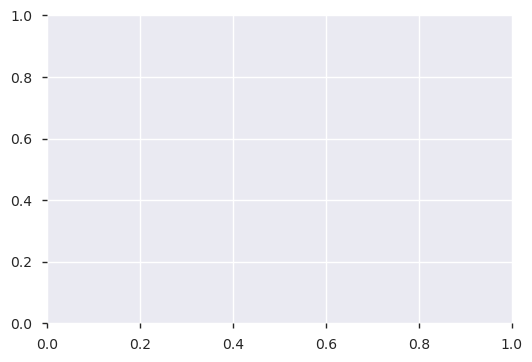

In [18]:
%%time

if dask_cudf_run:
    profiled_dask_cudf_report =  dask_cudf_profiling.ProfileReport(taxi_df_cdf)
else:
    profiled_dask_report =  dask_profiling.ProfileReport(taxi_df_ddf)

In [12]:
%%time

if dask_cudf_run:
    profiled_dask_cudf_report =  dask_cudf_profiling.ProfileReport(taxi_df_cdf)
else:
    profiled_dask_report =  dask_profiling.ProfileReport(taxi_df_ddf)

This is the current col being described  index
Total time elapsed in computing value_counts() is  0.001527547836303711
Total time elapsed in computing dropna + value_counts() is  0.0022749900817871094
Total time elapsed in getting count() is  0.0005450248718261719
Getting var type worked
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0006718635559082031
Total time elapsed in computing get_groupby_statistic is  3.0994415283203125e-06
Total time elapsed in computing count and distinct count compute() is  1.8311314582824707
Total time elapsed in computing mean is  0.0019559860229492188
Total time elapsed in computing std is  0.012559890747070312
Total time elapsed in computing variance is  0.0029964447021484375
Total time elapsed in computing min is  0.0009882450103759766
Total time elapsed in computing max is  0.0009400844573974609
Total time elapsed in dropping NA values is  0.0013699531555175781
Total time elapsed in computing percentile valu

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Total time elapsed in computing histogram series.compute()  1.7619807720184326
Total time elapsed in computing histogram series.dropna()  0.0028524398803710938
Total time elapsed in computing histogram cupy.histogram()  0.0348665714263916
Total time elapsed in computing histogram is  1.888246774673462
Total time elapsed in computing histogram series.compute()  1.7526710033416748
Total time elapsed in computing histogram series.dropna()  0.0024263858795166016
Total time elapsed in computing histogram cupy.histogram()  0.026468276977539062
Total time elapsed in computing mini-histogram is  1.8179693222045898
This is the current col being described  passenger_count
Total time elapsed in computing value_counts() is  0.0008988380432128906
Total time elapsed in computing dropna + value_counts() is  0.002244234085083008
Total time elapsed in getting count() is  0.0004222393035888672
Getting var type worked
Understood type of this col data  NUM
Total time elapsed in computing size and count is

Total time elapsed in computing histogram series.compute()  1.6078951358795166
Total time elapsed in computing histogram series.dropna()  0.001993417739868164
Total time elapsed in computing histogram cupy.histogram()  0.027828693389892578
Total time elapsed in computing mini-histogram is  1.856642723083496
This is the current col being described  rate_code
Total time elapsed in computing value_counts() is  0.0009639263153076172
Total time elapsed in computing dropna + value_counts() is  0.004197597503662109
Total time elapsed in getting count() is  0.0005681514739990234
Getting var type worked
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0007174015045166016
Total time elapsed in computing get_groupby_statistic is  3.0994415283203125e-06
Total time elapsed in computing count and distinct count compute() is  1.6172215938568115
Total time elapsed in computing mean is  0.0023360252380371094
Total time elapsed in computing std is  0.00465416908

The type of data reached at iterrows  <class 'dask_cudf.core.DataFrame'>
The data type of the partition in iterrows  <class 'list'>
Size of the list:  1
Type of 1st element  <class 'pandas.core.frame.DataFrame'>
Total time elapsed in computing and getting variable stats is  17.914777278900146
Total time elapsed in describe_df() is  144.58994674682617
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'n

Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  memorysize  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  type  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  mean  is  <

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Total time elapsed in to_html() is  0.7372291088104248
CPU times: user 16.6 s, sys: 2.94 s, total: 19.6 s
Wall time: 2min 26s


In [11]:
%%time

if dask_cudf_run:
    profiled_dask_cudf_report =  dask_cudf_profiling.ProfileReport(taxi_df_cdf)
else:
    profiled_dask_report =  dask_profiling.ProfileReport(taxi_df_ddf)

This is the current col being described  index
Total time elapsed in computing distinct count in get_vartype()  0.0
Total time elapsed in getting size of the series  0.00023627281188964844
Total time elapsed in getting vartype of the series  3.314018249511719e-05
Total time elapsed in get_vartype is  0.0003833770751953125
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0010495185852050781
Total time elapsed in computing value_counts() is  0.0017609596252441406
Total time elapsed in computing dropna + value_counts() is  0.0021452903747558594
Total time elapsed in getting count() is  0.0002677440643310547
Total time elapsed in end chunck of get_groupby_statistic is  2.1457672119140625e-06
Total time elapsed in computing get_groupby_statistic is  0.004673004150390625
Total time elapsed in computing count and distinct count compute() is  1.7736330032348633
Total time elapsed in computing mean is  0.00682377815246582
Total time elapsed in computing

Total time elapsed in computing histogram series.compute()  1.5680770874023438
Total time elapsed in computing histogram series.dropna()  0.0017359256744384766
Total time elapsed in computing histogram cupy.histogram()  0.026891708374023438
Total time elapsed in computing histogram is  1.6691160202026367
Total time elapsed in computing histogram series.compute()  1.7020313739776611
Total time elapsed in computing histogram series.dropna()  0.0018944740295410156
Total time elapsed in computing histogram cupy.histogram()  0.026428699493408203
Total time elapsed in computing mini-histogram is  1.7648515701293945
This is the current col being described  pickup_latitude
Total time elapsed in computing distinct count in get_vartype()  4.76837158203125e-07
Total time elapsed in getting size of the series  0.00019550323486328125
Total time elapsed in getting vartype of the series  4.124641418457031e-05
Total time elapsed in get_vartype is  0.0008740425109863281
Understood type of this col data

Total time elapsed in computing count and distinct count compute() is  1.8644859790802002
Total time elapsed in computing mean is  0.002612590789794922
Total time elapsed in computing std is  0.006363391876220703
Total time elapsed in computing variance is  0.004801750183105469
Total time elapsed in computing min is  0.0013053417205810547
Total time elapsed in computing max is  0.001458883285522461
Total time elapsed in dropping NA values is  0.001619577407836914
Total time elapsed in computing percentile values is  0.014200448989868164
Total time elapsed in computing skewness values is  0.005289793014526367
Total time elapsed in computing sum values is  0.0016369819641113281
Total time elapsed in computing MAD values is  0.0058405399322509766
Total time elapsed in computing n_zeros values is  0.0005047321319580078
The type of Series at dask_profiling.plot.histogram() is  <class 'dask_cudf.core.Series'>
Total time elapsed in computing histogram series.compute()  1.7526445388793945
Tota

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

In [15]:
taxi_df_cdf["passenger_count"].compute()

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


0         2
1         5
2         1
3         1
4         3
         ..
624276    1
624277    1
624278    3
624279    1
624280    3
Name: passenger_count, Length: 10906858, dtype: int32

In [16]:
%%time
#Running on UCX

if dask_cudf_run:
    profiled_dask_cudf_report =  dask_cudf_profiling.ProfileReport(taxi_df_cdf)
else:
    profiled_dask_report =  dask_profiling.ProfileReport(taxi_df_ddf)

This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0003504753112792969
Total time elapsed in getting vartype of the series  5.888938903808594e-05
Total time elapsed in get_vartype is  0.0006430149078369141
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0005962848663330078
Total time elapsed in computing dropna + value_counts() is  0.0031096935272216797
Total time elapsed in computing get_groupby_statistic is  0.003160238265991211
Total time elapsed in computing count and distinct count compute() is  0.2550976276397705
Total time elapsed in computing mean is  0.0011773109436035156
Total time elapsed in computing std is  0.004571437835693359
Total time elapsed in computing variance is  0.002794981002807617
Total time elapsed in computing min is  0.0006878376007080078
Total time elapsed in computing max is  0.0006673336029052734
Total time

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Total time elapsed in computing histogram series.compute()  0.4246866703033447
Total time elapsed in computing histogram series.dropna()  0.0030364990234375
Total time elapsed in computing histogram cupy.histogram()  0.03210759162902832
Total time elapsed in computing histograms is  0.5816020965576172
This is the current col being described  passenger_count
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00033283233642578125
Total time elapsed in getting vartype of the series  6.389617919921875e-05
Total time elapsed in get_vartype is  0.0006289482116699219
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0006206035614013672
Total time elapsed in computing dropna + value_counts() is  0.001875162124633789
Total time elapsed in computing get_groupby_statistic is  0.0019328594207763672
Total time elapsed in computing count and distinct count compute() is  0.2540469169616699
Total time

Total time elapsed in computing histogram series.compute()  0.30902957916259766
Total time elapsed in computing histogram series.dropna()  0.0028159618377685547
Total time elapsed in computing histogram cupy.histogram()  0.025929689407348633
Total time elapsed in computing histograms is  0.43291330337524414
This is the current col being described  dropoff_longitude
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002512931823730469
Total time elapsed in getting vartype of the series  4.696846008300781e-05
Total time elapsed in get_vartype is  0.000507354736328125
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0005805492401123047
Total time elapsed in computing dropna + value_counts() is  0.0039784908294677734
Total time elapsed in computing get_groupby_statistic is  0.004061460494995117
Total time elapsed in computing count and distinct count compute() is  0.24822664260864258
Tot

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Total time elapsed in to_html() is  2.227276086807251
CPU times: user 11.6 s, sys: 1.84 s, total: 13.5 s
Wall time: 32.5 s



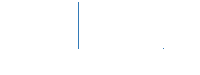
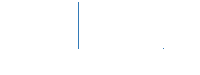

In [17]:
profiled_dask_cudf_report

### Generating speed-up comparison table

In [16]:
client

<Client: 'ucx://172.16.8.240:39012' processes=16 threads=16, memory=1.62 TB>

In [26]:
time_comparison_pickle =  "GPU_vs_CPU_time-profiling.pkl"

In [17]:
comparison_data_dict = {}

data_columns = ['passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount']


valid_2016_months = [str(x).rjust(2, '0') for x in range(1, 7)]

for i in range(6):
    comparison_data_dict["NYC_taxi_2016-"+str(6-i)+"-months"] = [base_path+'2016/yellow_tripdata_2016-'+month+'.csv' for month in valid_2016_months[i:]]
    
#Add 2015 and 2014 data to comparison_data_dict

if os.path.exists(time_comparison_pickle):
    with open(time_comparison_pickle,"rb") as file:
        time_comparison_dict = pkl.load(file)
else:
    time_comparison_dict = {"data-source":[],"dask-cudf_timing":[],"dask-timing":[]} #,"speed-x":[]}

avg_over_runs = 3

for data_source, path_list in tqdm(comparison_data_dict.items()):
    dask_cudf_runs_timing = []
    dask_runs_timing = []
    for run_i in range(avg_over_runs):
        if dask_cudf_run:
            #dask_cudf_run
            start_time = time.time()
            #reading data
            taxi_df_cdf = dask_cudf.read_csv(path_list,encoding='UTF-8',npartitions=npartitions).map_partitions(clean, must_haves, meta=must_haves)
            taxi_df_cdf = taxi_df_cdf[data_columns]
            #Generating profile
            _ = dask_cudf_profiling.ProfileReport(taxi_df_cdf)
            end_time = time.time()
            dask_cudf_runs_timing.append((end_time -start_time))
            dask_runs_timing.append(np.NaN)
            del taxi_df_cdf
        else:
            #dask_run
            start_time = time.time()
            #reading data
            taxi_df_ddf = dd.from_pandas(pd.read_csv(path_list,encoding='UTF-8'),npartitions=npartitions).map_partitions(clean, must_haves, meta=must_haves)
            taxi_df_ddf = taxi_df_ddf[data_columns]
            #Generating profile
            _ = dask_profiling.ProfileReport(taxi_df_ddf)
            end_time = time.time()
            dask_runs_timing.append((end_time -start_time))
            dask_cudf_runs_timing.append(np.NaN)
            del taxi_df_ddf

    time_comparison_dict["data-source"].append(data_source)
    time_comparison_dict["dask-cudf_timing"].append(np.mean(dask_cudf_runs_timing))
    time_comparison_dict["dask-timing"].append(np.mean(dask_runs_timing))
    with open(time_comparison_pickle,"wb") as file:
        pkl.dump(time_comparison_dict,file)

  0%|          | 0/6 [00:00<?, ?it/s]

This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00038433074951171875
Total time elapsed in getting vartype of the series  5.650520324707031e-05
Total time elapsed in get_vartype is  0.0007426738739013672
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0015120506286621094
Total time elapsed in computing dropna + value_counts() is  0.0028946399688720703
Total time elapsed in computing get_groupby_statistic is  0.002946138381958008
Total time elapsed in computing count and distinct count compute() is  0.8202886581420898
Total time elapsed in computing mean is  0.006143808364868164
Total time elapsed in computing std is  0.006198883056640625
Total time elapsed in computing variance is  0.0033402442932128906
Total time elapsed in computing min is  0.0007112026214599609
Total time elapsed in computing max is  0.0006895065307617188
Total tim

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Total time elapsed in computing histograms is  1.8370945453643799
This is the current col being described  passenger_count
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0003561973571777344
Total time elapsed in getting vartype of the series  5.745887756347656e-05
Total time elapsed in get_vartype is  0.0006496906280517578
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0015940666198730469
Total time elapsed in computing dropna + value_counts() is  0.0038564205169677734
Total time elapsed in computing get_groupby_statistic is  0.003904104232788086
Total time elapsed in computing count and distinct count compute() is  0.8192398548126221
Total time elapsed in computing mean is  0.0021774768829345703
Total time elapsed in computing std is  0.005231142044067383
Total time elapsed in computing variance is  0.003744840621948242
Total time elapsed in computing min is  0.0007245540618896

Total time elapsed in computing histogram series.compute()  1.1934285163879395
Total time elapsed in computing histogram series.dropna()  0.005153179168701172
Total time elapsed in computing histogram cupy.histogram()  0.15635228157043457
Total time elapsed in computing histograms is  1.446120262145996
This is the current col being described  dropoff_longitude
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002830028533935547
Total time elapsed in getting vartype of the series  5.888938903808594e-05
Total time elapsed in get_vartype is  0.0005419254302978516
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.001474142074584961
Total time elapsed in computing dropna + value_counts() is  0.0027723312377929688
Total time elapsed in computing get_groupby_statistic is  0.002825498580932617
Total time elapsed in computing count and distinct count compute() is  0.7955904006958008
Total tim

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Total time elapsed in to_html() is  0.655240535736084
This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.000331878662109375
Total time elapsed in getting vartype of the series  5.412101745605469e-05
Total time elapsed in get_vartype is  0.0030133724212646484
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0017635822296142578
Total time elapsed in computing dropna + value_counts() is  0.002122640609741211
Total time elapsed in computing get_groupby_statistic is  0.0021665096282958984
Total time elapsed in computing count and distinct count compute() is  0.8008663654327393
Total time elapsed in computing mean is  0.0014605522155761719
Total time elapsed in computing std is  0.003986835479736328
Total time elapsed in computing variance is  0.0031592845916748047
Total time elapsed in computing min is  0.0008342266082763672
Total time elapsed

Total time elapsed in computing histogram series.compute()  1.1844837665557861
Total time elapsed in computing histogram series.dropna()  0.005147695541381836
Total time elapsed in computing histogram cupy.histogram()  0.16816425323486328
Total time elapsed in computing histograms is  1.4488739967346191
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.000263214111328125
Total time elapsed in getting vartype of the series  5.1021575927734375e-05
Total time elapsed in get_vartype is  0.0005011558532714844
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0014545917510986328
Total time elapsed in computing dropna + value_counts() is  0.004241943359375
Total time elapsed in computing get_groupby_statistic is  0.0043065547943115234
Total time elapsed in computing count and distinct count compute() is  0.7720935344696045
Total time elapsed

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  memorysize  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  type  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  mean  is  <

Total time elapsed in computing count and distinct count compute() is  0.8012256622314453
Total time elapsed in computing mean is  0.0022687911987304688
Total time elapsed in computing std is  0.006445407867431641
Total time elapsed in computing variance is  0.005517005920410156
Total time elapsed in computing min is  0.0013251304626464844
Total time elapsed in computing max is  0.0012776851654052734
Total time elapsed in dropping NA values is  0.0013022422790527344
Total time elapsed in computing percentile values is  0.013722419738769531
Total time elapsed in computing skewness values is  0.007143735885620117
Total time elapsed in computing sum values is  0.0014464855194091797
Total time elapsed in computing MAD values is  0.007195472717285156
Total time elapsed in computing n_zeros values is  0.0005023479461669922
Total time elapsed in computing histogram series.compute()  1.1899967193603516
Total time elapsed in computing histogram series.dropna()  0.007915496826171875
Total time e

Total time elapsed in computing count and distinct count compute() is  0.8010871410369873
Total time elapsed in computing mean is  0.0025267601013183594
Total time elapsed in computing std is  0.0068743228912353516
Total time elapsed in computing variance is  0.005253314971923828
Total time elapsed in computing min is  0.0012698173522949219
Total time elapsed in computing max is  0.0012717247009277344
Total time elapsed in dropping NA values is  0.001352071762084961
Total time elapsed in computing percentile values is  0.012539148330688477
Total time elapsed in computing skewness values is  0.005678415298461914
Total time elapsed in computing sum values is  0.0012710094451904297
Total time elapsed in computing MAD values is  0.007349252700805664
Total time elapsed in computing n_zeros values is  0.0005662441253662109
Total time elapsed in computing histogram series.compute()  1.5115272998809814
Total time elapsed in computing histogram series.dropna()  0.005148410797119141
Total time e

Type of data in dask_profiling.report.fmt() for  25%  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  50%  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  75%  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  95%  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  iqr  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  skewness  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  sum  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  mad  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  cv  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_zeros  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_zeros  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.

 17%|█▋        | 1/6 [04:08<20:41, 248.33s/it]

This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002682209014892578
Total time elapsed in getting vartype of the series  4.982948303222656e-05
Total time elapsed in get_vartype is  0.0027167797088623047
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0013501644134521484
Total time elapsed in computing dropna + value_counts() is  0.002580881118774414
Total time elapsed in computing get_groupby_statistic is  0.0026335716247558594
Total time elapsed in computing count and distinct count compute() is  0.7432570457458496
Total time elapsed in computing mean is  0.0014369487762451172
Total time elapsed in computing std is  0.004381895065307617
Total time elapsed in computing variance is  0.003357410430908203
Total time elapsed in computing min is  0.0007498264312744141
Total time elapsed in computing max is  0.0006699562072753906
Total time

Total time elapsed in computing histogram series.compute()  1.0719101428985596
Total time elapsed in computing histogram series.dropna()  0.004593372344970703
Total time elapsed in computing histogram cupy.histogram()  0.14246487617492676
Total time elapsed in computing histograms is  1.3080570697784424
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002512931823730469
Total time elapsed in getting vartype of the series  4.9591064453125e-05
Total time elapsed in get_vartype is  0.0004975795745849609
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0012791156768798828
Total time elapsed in computing dropna + value_counts() is  0.0032765865325927734
Total time elapsed in computing get_groupby_statistic is  0.0033283233642578125
Total time elapsed in computing count and distinct count compute() is  0.7326910495758057
Total time elaps

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Total time elapsed in to_html() is  0.6097712516784668
This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002543926239013672
Total time elapsed in getting vartype of the series  5.14984130859375e-05
Total time elapsed in get_vartype is  0.0005135536193847656
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.001338958740234375
Total time elapsed in computing dropna + value_counts() is  0.004172563552856445
Total time elapsed in computing get_groupby_statistic is  0.004234790802001953
Total time elapsed in computing count and distinct count compute() is  0.7473797798156738
Total time elapsed in computing mean is  0.0014505386352539062
Total time elapsed in computing std is  0.003700733184814453
Total time elapsed in computing variance is  0.0030155181884765625
Total time elapsed in computing min is  0.0007035732269287109
Total time elapsed 

Total time elapsed in computing histogram series.compute()  1.0872578620910645
Total time elapsed in computing histogram series.dropna()  0.00464177131652832
Total time elapsed in computing histogram cupy.histogram()  0.14186954498291016
Total time elapsed in computing histograms is  1.3243224620819092
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00025463104248046875
Total time elapsed in getting vartype of the series  5.269050598144531e-05
Total time elapsed in get_vartype is  0.0010085105895996094
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.001332998275756836
Total time elapsed in computing dropna + value_counts() is  0.0036725997924804688
Total time elapsed in computing get_groupby_statistic is  0.0037271976470947266
Total time elapsed in computing count and distinct count compute() is  0.7499048709869385
Total time elap

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00026416778564453125
Total time elapsed in getting vartype of the series  4.839897155761719e-05
Total time elapsed in get_vartype is  0.0005168914794921875
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0012624263763427734
Total time elapsed in computing dropna + value_counts() is  0.0020558834075927734
Total time elapsed in computing get_groupby_statistic is  0.002103567123413086
Total time elapsed in computing count and distinct count compute() is  0.6777632236480713
Total time elapsed in computing mean is  0.002515077590942383
Total time elapsed in computing std is  0.00674128532409668
Total time elapsed in computing variance is  0.005073070526123047
Total time elapsed in computing min is  0.001425027847290039
Total time elapsed in computing max is  0.00128936767578125
Total time elapsed in dropping NA values is  0.00148701667785

Total time elapsed in computing histogram series.compute()  1.0733232498168945
Total time elapsed in computing histogram series.dropna()  0.004631996154785156
Total time elapsed in computing histogram cupy.histogram()  0.14136075973510742
Total time elapsed in computing histograms is  1.3059086799621582
Total time elapsed in describe_1d of all columns is  53.55248498916626
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  12.886576652526855
Total time elapsed in adding initial stats to table stats is  0.12363028526306152
Total time elapsed in adding memsize to table stats is  1.6207466125488281
Total time elapsed in getting final describe results passed to `to_html` is  2.3346431255340576
Total time elapsed in describe_df() is  72.05386924743652
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in d

Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  memorysize  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  type  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  mean  is  <

 33%|███▎      | 2/6 [07:46<15:57, 239.41s/it]

Total time elapsed in to_html() is  0.6369082927703857
This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002684593200683594
Total time elapsed in getting vartype of the series  5.125999450683594e-05
Total time elapsed in get_vartype is  0.0005176067352294922
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0011725425720214844
Total time elapsed in computing dropna + value_counts() is  0.003764629364013672
Total time elapsed in computing get_groupby_statistic is  0.003818511962890625
Total time elapsed in computing count and distinct count compute() is  0.562819242477417
Total time elapsed in computing mean is  0.00133514404296875
Total time elapsed in computing std is  0.0037500858306884766
Total time elapsed in computing variance is  0.0030112266540527344
Total time elapsed in computing min is  0.0007636547088623047
Total time elapsed 

Total time elapsed in computing histogram series.compute()  0.8029427528381348
Total time elapsed in computing histogram series.dropna()  0.0041086673736572266
Total time elapsed in computing histogram cupy.histogram()  0.11429595947265625
Total time elapsed in computing histograms is  1.0061821937561035
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00026035308837890625
Total time elapsed in getting vartype of the series  4.982948303222656e-05
Total time elapsed in get_vartype is  0.0005035400390625
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0011508464813232422
Total time elapsed in computing dropna + value_counts() is  0.0023555755615234375
Total time elapsed in computing get_groupby_statistic is  0.0024242401123046875
Total time elapsed in computing count and distinct count compute() is  0.5496277809143066
Total time elap

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Type of data in dask_profiling.report.fmt() for  p_zeros  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  histogram  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  mini_histogram  is  <class 'str'>
The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'nump

Total time elapsed in computing histogram series.compute()  0.8290512561798096
Total time elapsed in computing histogram series.dropna()  0.0041048526763916016
Total time elapsed in computing histogram cupy.histogram()  0.11457300186157227
Total time elapsed in computing histograms is  1.0371179580688477
This is the current col being described  pickup_latitude
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002524852752685547
Total time elapsed in getting vartype of the series  5.245208740234375e-05
Total time elapsed in get_vartype is  0.0005109310150146484
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0011210441589355469
Total time elapsed in computing dropna + value_counts() is  0.0024747848510742188
Total time elapsed in computing get_groupby_statistic is  0.0025234222412109375
Total time elapsed in computing count and distinct count compute() is  0.5623245239257812
Total t

Total time elapsed in computing histogram series.compute()  0.8215367794036865
Total time elapsed in computing histogram series.dropna()  0.004099369049072266
Total time elapsed in computing histogram cupy.histogram()  0.11405134201049805
Total time elapsed in computing histograms is  1.024890661239624
Total time elapsed in describe_1d of all columns is  42.590675830841064
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  10.869195461273193
Total time elapsed in adding initial stats to table stats is  0.08907365798950195
Total time elapsed in adding memsize to table stats is  1.395498275756836
Total time elapsed in getting final describe results passed to `to_html` is  1.8565218448638916
Total time elapsed in describe_df() is  58.123140811920166
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in d

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0003151893615722656
Total time elapsed in getting vartype of the series  5.459785461425781e-05
Total time elapsed in get_vartype is  0.0005919933319091797
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0011556148529052734
Total time elapsed in computing dropna + value_counts() is  0.002813100814819336
Total time elapsed in computing get_groupby_statistic is  0.0028591156005859375
Total time elapsed in computing count and distinct count compute() is  0.5540249347686768
Total time elapsed in computing mean is  0.001953601837158203
Total time elapsed in computing std is  0.006279468536376953
Total time elapsed in computing variance is  0.00498652458190918
Total time elapsed in computing min is  0.0014264583587646484
Total time elapsed in computing max is  0.0014293193817138672
Total time elapsed in dropping NA values is  0.001312971115

Total time elapsed in computing histogram series.compute()  0.8416657447814941
Total time elapsed in computing histogram series.dropna()  0.004095554351806641
Total time elapsed in computing histogram cupy.histogram()  0.11391377449035645
Total time elapsed in computing histograms is  1.0433030128479004
Total time elapsed in describe_1d of all columns is  42.84251117706299
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  10.802234172821045
Total time elapsed in adding initial stats to table stats is  0.047917842864990234
Total time elapsed in adding memsize to table stats is  1.4002244472503662
Total time elapsed in getting final describe results passed to `to_html` is  1.8426928520202637
Total time elapsed in describe_df() is  58.132193088531494
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

 50%|█████     | 3/6 [10:41<10:59, 219.96s/it]

Total time elapsed in to_html() is  0.6089189052581787
This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00031113624572753906
Total time elapsed in getting vartype of the series  5.173683166503906e-05
Total time elapsed in get_vartype is  0.0005879402160644531
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0009734630584716797
Total time elapsed in computing dropna + value_counts() is  0.002378225326538086
Total time elapsed in computing get_groupby_statistic is  0.002438068389892578
Total time elapsed in computing count and distinct count compute() is  0.5126791000366211
Total time elapsed in computing mean is  0.0012018680572509766
Total time elapsed in computing std is  0.003634214401245117
Total time elapsed in computing variance is  0.002948760986328125
Total time elapsed in computing min is  0.0008578300476074219
Total time elapse

Total time elapsed in computing histogram series.compute()  0.7238740921020508
Total time elapsed in computing histogram series.dropna()  0.0035865306854248047
Total time elapsed in computing histogram cupy.histogram()  0.08494329452514648
Total time elapsed in computing histograms is  0.901904821395874
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002930164337158203
Total time elapsed in getting vartype of the series  5.054473876953125e-05
Total time elapsed in get_vartype is  0.0005691051483154297
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0009500980377197266
Total time elapsed in computing dropna + value_counts() is  0.002294301986694336
Total time elapsed in computing get_groupby_statistic is  0.003092527389526367
Total time elapsed in computing count and distinct count compute() is  0.4961888790130615
Total time elaps

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0003502368927001953
Total time elapsed in getting vartype of the series  6.890296936035156e-05
Total time elapsed in get_vartype is  0.0023937225341796875
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0009875297546386719
Total time elapsed in computing dropna + value_counts() is  0.002368927001953125
Total time elapsed in computing get_groupby_statistic is  0.002418994903564453
Total time elapsed in computing count and distinct count compute() is  0.4901299476623535
Total time elapsed in computing mean is  0.0027625560760498047
Total time elapsed in computing std is  0.007180213928222656
Total time elapsed in computing variance is  0.005091428756713867
Total time elapsed in computing min is  0.0013535022735595703
Total time elapsed in computing max is  0.0013151168823242188
Total time elapsed in dropping NA values is  0.00154328346

Total time elapsed in computing histogram series.compute()  0.6911706924438477
Total time elapsed in computing histogram series.dropna()  0.0035746097564697266
Total time elapsed in computing histogram cupy.histogram()  0.08485627174377441
Total time elapsed in computing histograms is  0.8675200939178467
Total time elapsed in describe_1d of all columns is  40.55569863319397
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  8.672037124633789
Total time elapsed in adding initial stats to table stats is  0.01112985610961914
Total time elapsed in adding memsize to table stats is  1.1353535652160645
Total time elapsed in getting final describe results passed to `to_html` is  1.6487667560577393
Total time elapsed in describe_df() is  53.12625980377197
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in d

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002448558807373047
Total time elapsed in getting vartype of the series  4.982948303222656e-05
Total time elapsed in get_vartype is  0.0004723072052001953
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0008807182312011719
Total time elapsed in computing dropna + value_counts() is  0.003621339797973633
Total time elapsed in computing get_groupby_statistic is  0.0036742687225341797
Total time elapsed in computing count and distinct count compute() is  0.4922912120819092
Total time elapsed in computing mean is  0.0018062591552734375
Total time elapsed in computing std is  0.0064830780029296875
Total time elapsed in computing variance is  0.005461931228637695
Total time elapsed in computing min is  0.0015759468078613281
Total time elapsed in computing max is  0.0014336109161376953
Total time elapsed in dropping NA values is  0.001316070

Total time elapsed in computing histogram series.compute()  0.6883771419525146
Total time elapsed in computing histogram series.dropna()  0.0035698413848876953
Total time elapsed in computing histogram cupy.histogram()  0.08486700057983398
Total time elapsed in computing histograms is  0.8647115230560303
Total time elapsed in describe_1d of all columns is  40.611913204193115
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  8.5702543258667
Total time elapsed in adding initial stats to table stats is  0.07742834091186523
Total time elapsed in adding memsize to table stats is  1.278604507446289
Total time elapsed in getting final describe results passed to `to_html` is  1.3909287452697754
Total time elapsed in describe_df() is  53.021666049957275
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in da

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

 67%|██████▋   | 4/6 [13:21<06:44, 202.06s/it]

Total time elapsed in to_html() is  0.6100547313690186
This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00025463104248046875
Total time elapsed in getting vartype of the series  5.173683166503906e-05
Total time elapsed in get_vartype is  0.0004980564117431641
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0007331371307373047
Total time elapsed in computing dropna + value_counts() is  0.0021839141845703125
Total time elapsed in computing get_groupby_statistic is  0.0022974014282226562
Total time elapsed in computing count and distinct count compute() is  0.49671125411987305
Total time elapsed in computing mean is  0.0015652179718017578
Total time elapsed in computing std is  0.003534555435180664
Total time elapsed in computing variance is  0.0026755332946777344
Total time elapsed in computing min is  0.0006487369537353516
Total time el

Total time elapsed in computing histogram series.compute()  0.6224145889282227
Total time elapsed in computing histogram series.dropna()  0.0031752586364746094
Total time elapsed in computing histogram cupy.histogram()  0.05624222755432129
Total time elapsed in computing histograms is  0.764862060546875
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00023651123046875
Total time elapsed in getting vartype of the series  5.054473876953125e-05
Total time elapsed in get_vartype is  0.0004742145538330078
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.000713348388671875
Total time elapsed in computing dropna + value_counts() is  0.0017151832580566406
Total time elapsed in computing get_groupby_statistic is  0.0017695426940917969
Total time elapsed in computing count and distinct count compute() is  0.29695940017700195
Total time elaps

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00022721290588378906
Total time elapsed in getting vartype of the series  4.8160552978515625e-05
Total time elapsed in get_vartype is  0.0004520416259765625
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0007052421569824219
Total time elapsed in computing dropna + value_counts() is  0.00208282470703125
Total time elapsed in computing get_groupby_statistic is  0.0021359920501708984
Total time elapsed in computing count and distinct count compute() is  0.2983217239379883
Total time elapsed in computing mean is  0.0016357898712158203
Total time elapsed in computing std is  0.0062525272369384766
Total time elapsed in computing variance is  0.005263328552246094
Total time elapsed in computing min is  0.0013070106506347656
Total time elapsed in computing max is  0.0020406246185302734
Total time elapsed in dropping NA values is  0.00146198

Total time elapsed in computing histogram series.compute()  0.4537851810455322
Total time elapsed in computing histogram series.dropna()  0.004157066345214844
Total time elapsed in computing histogram cupy.histogram()  0.057238101959228516
Total time elapsed in computing histograms is  0.5989530086517334
Total time elapsed in describe_1d of all columns is  30.12411069869995
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  6.000613212585449
Total time elapsed in adding initial stats to table stats is  0.010547637939453125
Total time elapsed in adding memsize to table stats is  1.9319851398468018
Total time elapsed in getting final describe results passed to `to_html` is  1.042997121810913
Total time elapsed in describe_df() is  39.852465867996216
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in 

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002391338348388672
Total time elapsed in getting vartype of the series  4.839897155761719e-05
Total time elapsed in get_vartype is  0.00048351287841796875
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.000705718994140625
Total time elapsed in computing dropna + value_counts() is  0.002936124801635742
Total time elapsed in computing get_groupby_statistic is  0.0029947757720947266
Total time elapsed in computing count and distinct count compute() is  0.2974119186401367
Total time elapsed in computing mean is  0.0016567707061767578
Total time elapsed in computing std is  0.006243228912353516
Total time elapsed in computing variance is  0.004648447036743164
Total time elapsed in computing min is  0.0013108253479003906
Total time elapsed in computing max is  0.0013175010681152344
Total time elapsed in dropping NA values is  0.0013246536

Total time elapsed in computing histogram series.compute()  0.4598078727722168
Total time elapsed in computing histogram series.dropna()  0.004052400588989258
Total time elapsed in computing histogram cupy.histogram()  0.05975174903869629
Total time elapsed in computing histograms is  0.6077916622161865
Total time elapsed in describe_1d of all columns is  29.463408708572388
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  5.339552164077759
Total time elapsed in adding initial stats to table stats is  0.05605578422546387
Total time elapsed in adding memsize to table stats is  1.0769805908203125
Total time elapsed in getting final describe results passed to `to_html` is  1.0463650226593018
Total time elapsed in describe_df() is  37.68489408493042
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in d

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

 83%|████████▎ | 5/6 [15:20<02:56, 176.99s/it]

Total time elapsed in to_html() is  0.6051340103149414
This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00025272369384765625
Total time elapsed in getting vartype of the series  5.078315734863281e-05
Total time elapsed in get_vartype is  0.0019397735595703125
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0005536079406738281
Total time elapsed in computing dropna + value_counts() is  0.002212047576904297
Total time elapsed in computing get_groupby_statistic is  0.002266407012939453
Total time elapsed in computing count and distinct count compute() is  0.23665237426757812
Total time elapsed in computing mean is  0.0009565353393554688
Total time elapsed in computing std is  0.0030934810638427734
Total time elapsed in computing variance is  0.0025701522827148438
Total time elapsed in computing min is  0.0008060932159423828
Total time ela

Total time elapsed in computing histogram series.compute()  0.30669426918029785
Total time elapsed in computing histogram series.dropna()  0.0029168128967285156
Total time elapsed in computing histogram cupy.histogram()  0.02826690673828125
Total time elapsed in computing histograms is  1.2841382026672363
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.00023245811462402344
Total time elapsed in getting vartype of the series  5.1021575927734375e-05
Total time elapsed in get_vartype is  0.0020051002502441406
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0005662441253662109
Total time elapsed in computing dropna + value_counts() is  0.0016889572143554688
Total time elapsed in computing get_groupby_statistic is  0.0017430782318115234
Total time elapsed in computing count and distinct count compute() is  0.23695802688598633
Total tim

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Data type at plot.correlation_matrix <class 'pandas.core.frame.DataFrame'>
Total time elapsed in to_html() is  0.5978641510009766
This is the current col being described  index
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002415180206298828
Total time elapsed in getting vartype of the series  5.078315734863281e-05
Total time elapsed in get_vartype is  0.0018761157989501953
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0005505084991455078
Total time elapsed in computing dropna + value_counts() is  0.0022859573364257812
Total time elapsed in computing get_groupby_statistic is  0.002337932586669922
Total time elapsed in computing count and distinct count compute() is  0.23599910736083984
Total time elapsed in computing mean is  0.0010447502136230469
Total time elapsed in computing std is  0.0032396316528320312
Total time elapsed in computing variance is  0.0027878284454345703
T

Total time elapsed in computing histogram series.compute()  0.3063809871673584
Total time elapsed in computing histogram series.dropna()  0.005938053131103516
Total time elapsed in computing histogram cupy.histogram()  0.028359413146972656
Total time elapsed in computing histograms is  0.42952656745910645
This is the current col being described  rate_code
DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002281665802001953
Total time elapsed in getting vartype of the series  5.1975250244140625e-05
Total time elapsed in get_vartype is  0.00045871734619140625
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0005481243133544922
Total time elapsed in computing dropna + value_counts() is  0.0037283897399902344
Total time elapsed in computing get_groupby_statistic is  0.0037860870361328125
Total time elapsed in computing count and distinct count compute() is  0.23369193077087402
Total tim

The type of freqtable data at dask_profiling.report.freq_table is  <class 'pandas.core.series.Series'>
The type of freqtable data at dask_profiling.report.freq_table iloc is  <class 'pandas.core.series.Series'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'cupy.core.core.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
T

Type of data in dask_profiling.report.fmt() for  n  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  nvar  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  total_missing  is  <class 'float'>
Type of data in dask_profiling.report.fmt() for  n_duplicates  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  memsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  recordsize  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  NUM  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  DATE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CONST  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CAT  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  UNIQUE  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  CORR  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  RECODED  is  <class 'int'>
Type of data i

DataType at get_vartype is  <class 'dask_cudf.core.Series'>
Total time elapsed in getting size of the series  0.0002300739288330078
Total time elapsed in getting vartype of the series  5.173683166503906e-05
Total time elapsed in get_vartype is  0.00046944618225097656
Understood type of this col data  NUM
Total time elapsed in computing size and count is  0.0005474090576171875
Total time elapsed in computing dropna + value_counts() is  0.004316806793212891
Total time elapsed in computing get_groupby_statistic is  0.00437617301940918
Total time elapsed in computing count and distinct count compute() is  0.23569846153259277
Total time elapsed in computing mean is  0.0016453266143798828
Total time elapsed in computing std is  0.006019115447998047
Total time elapsed in computing variance is  0.00467228889465332
Total time elapsed in computing min is  0.0014805793762207031
Total time elapsed in computing max is  0.0014121532440185547
Total time elapsed in dropping NA values is  0.00139641761

Total time elapsed in computing histogram series.compute()  0.3577718734741211
Total time elapsed in computing histogram series.dropna()  0.005101442337036133
Total time elapsed in computing histogram cupy.histogram()  0.02832794189453125
Total time elapsed in computing histograms is  0.47539782524108887
Total time elapsed in describe_1d of all columns is  18.7521653175354
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
Total time elapsed in computing and getting variable stats is  3.7946112155914307
Total time elapsed in adding initial stats to table stats is  0.04128241539001465
Total time elapsed in adding memsize to table stats is  0.38056206703186035
Total time elapsed in getting final describe results passed to `to_html` is  0.5562832355499268
Total time elapsed in describe_df() is  24.15697741508484
This is the type of data at to_html <class 'dict'>
Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in 

Data type at plot.correlation_matrix <class 'pandas.core.frame.DataFrame'>


100%|██████████| 6/6 [16:35<00:00, 165.89s/it]

Total time elapsed in to_html() is  0.6014385223388672


{'data-source': ['NYC_taxi_2016-6-months',
  'NYC_taxi_2016-5-months',
  'NYC_taxi_2016-4-months',
  'NYC_taxi_2016-3-months',
  'NYC_taxi_2016-2-months',
  'NYC_taxi_2016-1-months'],
 'dask-cudf_timing': [82.77569325764973,
  72.86326742172241,
  58.200095097223915,
  53.42468579610189,
  39.50134150187174,
  25.003244082132976],
 'dask-timing': [1.5894571940104166e-07,
  3.178914388020833e-07,
  1.5894571940104166e-07,
  2.384185791015625e-07,
  2.384185791015625e-07,
  2.384185791015625e-07],
 'speed-x': [0, 0, 0, 0, 0, 0]}

In [28]:
with open(time_comparison_pickle,"wb") as file:
        pkl.dump(time_comparison_dict,file)

In [21]:
time_comparison_dict["speed-x"] = [0,0,0,0,0,0]

In [23]:
print(pd.DataFrame.from_dict(time_comparison_dict))

              data-source  dask-cudf_timing   dask-timing  speed-x
0  NYC_taxi_2016-6-months         82.775693  1.589457e-07        0
1  NYC_taxi_2016-5-months         72.863267  3.178914e-07        0
2  NYC_taxi_2016-4-months         58.200095  1.589457e-07        0
3  NYC_taxi_2016-3-months         53.424686  2.384186e-07        0
4  NYC_taxi_2016-2-months         39.501342  2.384186e-07        0
5  NYC_taxi_2016-1-months         25.003244  2.384186e-07        0


##### Finding 2:
* In clean function, the astype(datetime64[ms]) is working for dask_cudf dataframe but is not working for dask dataframe. I also tried astype for just a pandas series which works and logically in map_partition it basically divides it into various pandas dataframe individually. Unable to figure out the real cause.

* Figured out that it was because the `must_have` meta had datetime64[s] set up and that is not supported for pandas Series.

### <font color=blue>When dask_cudf is imported then dask.map_partitions is converting the dataframe to dask_cudf dataframe. Check if it's okay or needs a bug here.

In [15]:
#Pandas to dask -> map_partitions is converting it to dask_cudf when dask_cudf is imported
taxi_df_cdf = dd.from_pandas(pd.read_csv(valid_files[0],encoding='UTF-8'),npartitions=8).map_partitions(clean, must_haves, meta=must_haves)

In [16]:
type(taxi_df_cdf)

dask_cudf.core.DataFrame

In [19]:
#Pandas to dask
taxi_df_ddf = dd.from_pandas(pd.read_csv(valid_files[0],encoding='UTF-8'),npartitions=8)#.map_partitions(clean, must_haves, meta=must_haves)

In [20]:
type(taxi_df_ddf)

dask.dataframe.core.DataFrame

##### debuging the datetime conversion error

In [11]:
# df = pd.read_csv(valid_files[0],encoding='UTF-8')

# type(df["tpep_pickup_datetime"])

# df["tpep_pickup_datetime"] = df["tpep_pickup_datetime"].astype("datetime64[s]")

# df["tpep_dropoff_datetime"] = df["tpep_dropoff_datetime"].astype("datetime64[s]")

In [12]:
#type(taxi_df_ddf)

In [51]:
#The get partitions giving error
# tmp = taxi_df_cdf.get_partition(1).compute()


# tmp = tmp[0]

In [17]:
# tmp = taxi_df_cdf.map_partitions(clean,must_haves,meta=must_haves)

# type(taxi_df_cdf.get_partition(1).compute())

# "dask_cudf" in str(type(taxi_df_cdf))

In [25]:
taxi_df_cdf = taxi_df_cdf[['passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount']]

taxi_df_cdf.columns

Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'rate_code', 'dropoff_longitude', 'dropoff_latitude',
       'fare_amount'],
      dtype='object')

In [26]:
taxi_df_ddf.columns

NameError: name 'taxi_df_ddf' is not defined

In [10]:
taxi_df_ddf = taxi_df_ddf[['VendorID',
       'passenger_count', 'trip_distance']]

In [20]:
taxi_df_ddf = taxi_df_ddf[['passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount']]

In [19]:
# tmp = taxi_df_cdf.get_partition(1).compute()

# isinstance(tmp,cudf.DataFrame)

# tmp.to_pandas()

In [20]:
taxi_df_cdf.columns

Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'rate_code', 'dropoff_longitude', 'dropoff_latitude',
       'fare_amount'],
      dtype='object')

##### Finding 1:
    * So, if I read the data from pandas to dask to map_partitions then it becomes dask_cudf dataframe. In that scenario, `type(df.get_partitions(1).compute())` gives tuple.
    * But if read the data frame as dask_cudf.read_csv() in that case, `type(df.get_partitions(1).compute())` gives cudf.core.Dataframe.
    * But in both the cases when the code reaches, dask.Dataframe.core.py line 4111 it is getting converted to tuple situation. So there is something happening in the dask_profiling code that I will have to understand.

In [23]:
#if data is read as dask_cudf.read_csv
type(taxi_df_cdf.get_partition(1).compute())

cudf.core.dataframe.DataFrame

In [29]:
#if data is read as pandas->dask -> map_partitions
type(taxi_df_cdf.get_partition(1).compute())

tuple

In [30]:
#if data is read as pandas->dask -> map_partitions
type(taxi_df_cdf.get_partition(1).compute()[0])

pandas.core.frame.DataFrame

In [19]:
isinstance(taxi_df_cdf, dd.DataFrame)

True

In [18]:
isinstance(taxi_df_cdf, dask_cudf.DataFrame)

True

In [21]:
type(taxi_df_cdf)

dask_cudf.core.DataFrame

#### Verifying type(df[col]) gives what. For dask_profiling.describe.py line 391 

In [27]:
type(taxi_df_cdf["passenger_count"]),type(taxi_df_ddf["passenger_count"])

(dask_cudf.core.Series, dask.dataframe.core.Series)

#### Checking few differences between dask_cudf.Series vs dask.Series

In [18]:
dask_cudf_series = taxi_df_cdf["passenger_count"]

In [20]:
isinstance(dask_cudf_series,cudf.Series)

False

In [37]:
dask_series = taxi_df_ddf["passenger_count"]

In [22]:
dask_cudf_series.size, dask_series.size

(dd.Scalar<size-ag..., dtype=int64>, dd.Scalar<size-ag..., dtype=int64>)

In [36]:
dask_cudf_series.count(), dask_series.count()

(dd.Scalar<sum-agg..., dtype=int64>, dd.Scalar<series-..., dtype=int64>)

In [38]:
dask_cudf_series.memory_usage(),dask_series.memory_usage()

(Delayed('sum-9260bab3-3f7a-4ef5-9d4c-d9ccf384c40c'),
 Delayed('sum-8eab69f5-411b-4f6a-a38a-a36137309530'))

In [39]:
dask_cudf_series.mean(),dask_series.mean()

(dd.Scalar<truediv..., dtype=float64>, dd.Scalar<series-..., dtype=float64>)

In [41]:
dask_cudf_series.var(),dask_series.var()

(dd.Scalar<series-..., dtype=float64>, dd.Scalar<series-..., dtype=float64>)

In [42]:
dask_cudf_series.to_dask_array()#,dask_series.var()

dask.array<values, shape=(nan,), dtype=int32, chunksize=(nan,), chunktype=numpy.ndarray>

In [43]:
dask_series.to_dask_array()

dask.array<values, shape=(nan,), dtype=int64, chunksize=(nan,), chunktype=numpy.ndarray>

In [65]:
dask_cudf_series.size

dd.Scalar<size-ag..., dtype=int64>

In [11]:
dask_profiling.ProfileReport(taxi_df_ddf)

This is the current col being described  VendorID
Getting var type worked
Understood type of this col data  BOOL
This is the current col being described  passenger_count
Getting var type worked
Understood type of this col data  NUM
This is the current col being described  trip_distance
Getting var type worked
Understood type of this col data  NUM
This is the type for pearson correlation data <class 'dask_cudf.core.DataFrame'>
The type of data reached at iterrows  <class 'dask_cudf.core.DataFrame'>
The data type of the partition in iterrows  <class 'tuple'>


AttributeError: 'tuple' object has no attribute 'iterrows'

### Add an issue for the cudf.Series.size() not there.

In [19]:
tmp = taxi_df_cdf.get_partition(1).compute()

In [18]:
#tmp.iterrows()

### <font color=blue> Need to understand what's happening to the data as it goes into dask_profiling code. Why does the dask.dataframe.core.iterrows() part is breaking. Why does it return tuple or list whenever I run compute and also, why does the individual dataframe after compute gets converted to pandas.core.frame.Dataframe instead of cudf.core.frame.Dataframe? </font>

<font color=blue> The size parameter in cudf.core.Series is still missing in my remote version, even thought the update is been corrected on Git. Need to install the latest version </font>

<font color=blue> The value_counts in cudf.core.Series.value_counts() is also not updated to the new version which takes the parameter `ascending` even after installing the latest build. The latest git code has the correct function so copied it from Git for now.</font>

<font color=blue> Solved the problem of value_counts(), but now getting the error of `inferred_type` for the value_counts() output</font>

<font color=blue> Commented and moved on from the `inferred_type` issue. </font>

<font color=blue> Getting the issue of cupy.array in `scipy.stats.stats.py` 
    
Changed line 221 in `scipy.stats.stats.py` to incorporate for cupy array.
</font>

<font color=blue> For some reason, I am not getting the `scipy.stats.stats` error even after commenting the change that I made.
</font>


<font color=blue> Realized that current dataset has all values as num vartype. Testing various operations in `dask_profiling.describe.describe_numeric_1d()`.
    See more details below in the notebook.
</font>



<font color=blue> Most of the values reaching at `dask_profiling.report.fmt()` are numpy array but 1 value reaching there is cupy array and that's throwing an error at pd.isnull(). Parking here for today, will resume from here tomorrow.
</font>

<font color=blue> Solved that and got stuck at `dask_profiling.report.freq_table()`.  cudf.Series doesn't have a method called `items()` unlike, pandas.Series()
</font>


#### IMP points list

<font color=blue> Most of the values reaching at `dask_profiling.report.fmt()` are numpy array but 1 value reaching there is cupy array and that's throwing an error at pd.isnull(). Parking here for today, will resume from here tomorrow.
</font>

In [19]:
profiled_dask_cudf_report =  dask_cudf_profiling.ProfileReport(taxi_df_cdf)

This is the current col being described  index
Getting var type worked
Understood type of this col data  NUM
The type of Series at dask_profiling.plot.histogram() is  <class 'dask_cudf.core.Series'>
This is the current col being described  passenger_count
Getting var type worked
Understood type of this col data  NUM
The type of Series at dask_profiling.plot.histogram() is  <class 'dask_cudf.core.Series'>
This is the current col being described  trip_distance
Getting var type worked
Understood type of this col data  NUM
The type of Series at dask_profiling.plot.histogram() is  <class 'dask_cudf.core.Series'>
This is the current col being described  pickup_longitude
Getting var type worked
Understood type of this col data  NUM
The type of Series at dask_profiling.plot.histogram() is  <class 'dask_cudf.core.Series'>
This is the current col being described  pickup_latitude
Getting var type worked
Understood type of this col data  NUM
The type of Series at dask_profiling.plot.histogram() is

Type of data in dask_profiling.report.fmt() for  count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  distinct_count  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_missing  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_missing  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  p_infinite  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  n_infinite  is  <class 'numpy.int64'>
Type of data in dask_profiling.report.fmt() for  is_unique  is  <class 'numpy.bool_'>
Type of data in dask_profiling.report.fmt() for  mode  is  <class 'numpy.ndarray'>
Type of data in dask_profiling.report.fmt() for  p_unique  is  <class 'numpy.float64'>
Type of data in dask_profiling.report.fmt() for  memorysize  is  <class 'int'>
Type of data in dask_profiling.report.fmt() for  type  is  <class 'str'>
Type of data in dask_profiling.report.fmt() for  mean  is  <class 'nu

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [20]:
profiled_dask_cudf_report

In [18]:
profiled_dask_cudf_report

In [ ]:
profiled_dask_cudf_report.to_file("dask_cudf_NYC_Taxi_profiled_report.html")

### Trying different elements to understand the best usage certain parts

##### Debugging `dask_profiling.base.get_groupby_statistic()` function 

In [19]:
d_c_series = taxi_df_cdf["trip_distance"]

In [20]:
d_c_series.size

dd.Scalar<size-ag..., dtype=int64>

In [54]:
d_p_series = taxi_df_ddf["trip_distance"]

In [ ]:
d_c_series.value_counts()

In [55]:
type(d_c_series), type(d_p_series)

(dask_cudf.core.Series, dask.dataframe.core.Series)

In [39]:
d_c_series.value_counts()

<dask_cudf.Series | 36 tasks | 1 npartitions>

In [62]:
#### For a dask_cudf.Series
print(d_c_series.value_counts())
value_counts_with_nan = d_c_series.value_counts()
value_counts_without_nan = d_c_series.dropna().value_counts()
print(d_c_series.value_counts().count())
print(type(value_counts_without_nan))

value_counts_with_nan.head()
value_counts_with_nan.index.head()

<dask_cudf.Series | 36 tasks | 1 npartitions>
dd.Scalar<sum-agg..., dtype=int64>
<class 'dask_cudf.core.Series'>


Float64Index([0.8999999761581421,  0.800000011920929,                1.0,
               1.100000023841858,  0.699999988079071],
             dtype='float32')

In [64]:
isinstance(value_counts_without_nan,dask_cudf.Series)

True

#### Solving the error "AttributeError: 'GenericIndex' object has no attribute 'inferred_type'" 

### cudf.core.index.GenericIndex is missing attribute "inferred_type" unlike pandas.core.indexes.numeric.Float64Index

In [57]:
d_c_series_val_cal = d_c_series.value_counts().index.head()

In [58]:
type(d_c_series_val_cal)

cudf.core.index.GenericIndex

In [59]:
d_p_series_val_cal = d_p_series.value_counts().index.head()

In [60]:
type(d_p_series_val_cal)

pandas.core.indexes.numeric.Float64Index

In [61]:
d_p_series_val_cal.inferred_type

'floating'

In [ ]:
d_c_series_val_cal

In [56]:
#### For a dask.Series
print(d_p_series.value_counts())
value_counts_with_nan = d_p_series.value_counts()
value_counts_without_nan = d_p_series.dropna().value_counts()
print(d_p_series.value_counts().count())
print(type(value_counts_without_nan))

value_counts_with_nan.head()
value_counts_with_nan.index.head()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: trip_distance, dtype: int64
Dask Name: value-counts-agg, 25 tasks
dd.Scalar<series-..., dtype=int64>
<class 'dask.dataframe.core.Series'>


Float64Index([0.9, 0.8, 1.0, 1.1, 0.7], dtype='float64')

In [38]:
c_series = d_c_series.compute()
p_series = d_p_series.compute()

In [39]:
type(c_series), type(p_series)

(cudf.core.series.Series, pandas.core.series.Series)

In [1]:
c_series.size

NameError: name 'c_series' is not defined

In [46]:
c_series.value_counts()

0.90          252833
0.80          251036
1.00          249272
1.10          240194
0.70          238000
               ...  
1403240.50         1
1653402.00         1
2441418.75         1
4667468.50         1
8000010.00         1
Name: trip_distance, Length: 4513, dtype: int32

In [47]:
p_series.value_counts()

0.90      252833
0.80      251036
1.00      249272
1.10      240194
0.70      238000
           ...  
58.40          1
40.54          1
58.10          1
40.96          1
272.20         1
Name: trip_distance, Length: 4513, dtype: int64

In [41]:
dask_profiling.base.get_groupby_statistic(d_c_series)

AttributeError: 'GenericIndex' object has no attribute 'inferred_type'

#### Realized that current dataset has all values as num vartype. Testing various operations in  `dask_profiling.describe.describe_numeric_1d()` 

In [43]:
from dask import delayed, compute
import scipy as sp
from dask.array import stats as dask_stats

In [24]:
d_c_series.mean().compute()

4.648197010541441

In [25]:
d_c_series.std().compute()

2981.095272054915

In [26]:
d_c_series.var().compute()

8886929.021068167

In [27]:
d_c_series.min().compute()

0.0

In [28]:
d_c_series.max().compute()

8000010.0

In [29]:
(d_c_series.max() - d_c_series.min()).compute()

8000010.0

In [30]:
_series_no_na = d_c_series.dropna()

In [32]:
_series_no_na.quantile(0.25).compute()

array(1.01999998)

###### computing kurtosis is giving error right now. Commenting this.

In [42]:
#compute(delayed(sp.stats.kurtosis)(d_c_series))

In [45]:
compute(delayed(float)(dask_stats.skew(d_c_series.to_dask_array())))

(2200.3359375,)

In [46]:
compute(d_c_series.sum())

(50697224.75,)

In [48]:
#mad
compute(d_c_series.sub(d_c_series.mean()).abs().mean())

(5.0487471735673095,)

In [49]:
#CV
compute(d_c_series.std() / d_c_series.mean())

(641.3444321086693,)

In [52]:
#n_zeros
compute(d_c_series.size - delayed(cupy.count_nonzero)(d_c_series))

(array(64065),)

In [21]:
## Pandas APIs are working well with cudf.Series as well so currently letting it run with this itself.
## Will have to change that to cudf apis later in the code
pd.api.types.is_numeric_dtype(taxi_df_cdf["trip_distance"])

True

In [17]:
c_series = cudf.Series(taxi_df_cdf["passenger_count"].compute())

In [20]:
type(c_series)

cudf.core.series.Series

In [22]:
isinstance(c_series,cudf.Series)

True

In [18]:
isinstance(c_series,cudf.DataFrame)

False

In [ ]:
#taxi_df_cdf.get_partition(1).compute()[0]

In [23]:
type(taxi_df_cdf.get_partition(1).compute())

cudf.core.dataframe.DataFrame

In [25]:
#taxi_df_cdf[0]

In [9]:
help(dask_profiling)

Help on package dask_profiling:

NAME
    dask_profiling - Main module of dask-profiling.

DESCRIPTION
    Docstring is compliant with NumPy/SciPy documentation standard:
    https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt
    See also for a short description of docstring:
    https://stackoverflow.com/questions/3898572/what-is-the-standard-python-docstring-format

PACKAGE CONTENTS
    base
    describe
    formatters
    plot
    report
    templates
    tests

CLASSES
    builtins.object
        ProfileReport
    
    class ProfileReport(builtins.object)
     |  ProfileReport(df, **kwargs)
     |  
     |  Generate a profile report from a Dataset stored as a dask `DataFrame`.
     |  
     |  Used has is it will output its content as an HTML report in a Jupyter notebook.
     |  
     |  Attributes
     |  ----------
     |  df : DataFrame
     |      Data to be analyzed
     |  bins : int
     |      Number of bins in histogram.
     |      The default is 10.
 

In [12]:
tmp = taxi_df_cdf.get_partition(1).compute()

### Optimizing for pushing the cupy.asnumpy() calls(GPU->CPU) to later in the flow

In [25]:
cupy_arr = cupy.array([1,2,3,4,5,6,7,8,9,0])

In [32]:
isinstance(cupy_arr,cupy.ndarray)

True

In [26]:
cupy.isnan(cupy_arr)

array([False, False, False, False, False, False, False, False, False,
       False])

In [27]:
#can't use cudf.Series on cupy array
cudf.Series.isnull(cupy_arr)

AttributeError: 'cupy.core.core.ndarray' object has no attribute '_columns'

#### Optimizing get_var_type() 

In [12]:
dask_cudf_Series = taxi_df_cdf["passenger_count"]

In [36]:
dask_cudf_Series.value_counts()

distributed.nanny - WARNING - Restarting worker


KilledWorker: ("('clean-getitem-read-csv-drop-duplicates-chunk-ba953cca691e5d1556e1ec20386b7323', 0, 4, 0)", <Worker 'ucx://127.0.0.1:60407', name: 1, memory: 0, processing: 3>)

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


### Testing operations on the entire dataframe

In [22]:
%%time
computed_stats = {}
computed_stats["mean"] = compute(taxi_df_cdf.mean())
computed_stats["std"] = compute(taxi_df_cdf.std())
computed_stats["var"] = compute(taxi_df_cdf.var())
computed_stats["min"] = compute(taxi_df_cdf.min())
computed_stats["max"] = compute(taxi_df_cdf.max())
taxi_df_cdf = taxi_df_cdf.dropna()

_percentile_format = "{:.0%}"
for percentile in np.array([0.05, 0.25, 0.5, 0.75, 0.95]):
        # The dropna() is a workaround for https://github.com/pydata/pandas/issues/13098

        #dask_profiling edit
        # It is of datatype dask.Dataframe.scalar and after computing it becomes cupy.ndarray.
        # Since we finally need numpy.ndarray, I am computing first and then converting to ndarray here itself.
        computed_stats[_percentile_format.format(percentile)] = compute(taxi_df_cdf.quantile(percentile))

computed_stats["sum"] = compute(taxi_df_cdf.sum())

#stats['skewness'] = delayed(float)(dask_stats.skew(series.to_dask_array()))        

#series.sub(series.mean()).abs().mean()
#stats['n_zeros'] = (series.size - delayed(cupy.count_nonzero)(series))

ArrowInvalid: Could not convert 1.0 with type cupy.core.core.ndarray: did not recognize Python value type when inferring an Arrow data type

In [23]:
%%time
dct = {}
_percentile_format = "{:.0%}"
for col in taxi_df_cdf.columns:
    dct[col] = {}
    dct[col]["mean"] = taxi_df_cdf[col].mean()
    dct[col]["std"] = taxi_df_cdf[col].std()
    dct[col]["var"] = taxi_df_cdf[col].var()
    dct[col]["min"] = taxi_df_cdf[col].min()
    dct[col]["max"] = taxi_df_cdf[col].max()
    dct[col]["mean"] = taxi_df_cdf[col].mean()
    _series_no_na = taxi_df_cdf[col].dropna()

    for percentile in np.array([0.05, 0.25, 0.5, 0.75, 0.95]):
            # The dropna() is a workaround for https://github.com/pydata/pandas/issues/13098

            #dask_profiling edit
            # It is of datatype dask.Dataframe.scalar and after computing it becomes cupy.ndarray.
            # Since we finally need numpy.ndarray, I am computing first and then converting to ndarray here itself.
            dct[col][_percentile_format.format(percentile)] = _series_no_na.quantile(percentile)

    dct[col]["sum"] = taxi_df_cdf[col].sum()

compute(dct)

CPU times: user 1.56 s, sys: 56 ms, total: 1.61 s
Wall time: 3.35 s


({'passenger_count': {'mean': 1.670846819496504,
   'std': 1.324890781676967,
   'var': 1.7553355833726048,
   'min': 0,
   'max': 9,
   '5%': array(1.),
   '25%': array(1.),
   '50%': array(1.),
   '75%': array(2.),
   '95%': array(6.),
   'sum': 18223689},
  'trip_distance': {'mean': 4.648197010541441,
   'std': 2981.095272054915,
   'var': 8886929.021068167,
   'min': 0.0,
   'max': 8000010.0,
   '5%': array(0.51999998),
   '25%': array(1.01999998),
   '50%': array(1.70000005),
   '75%': array(3.21000004),
   '95%': array(10.89999962),
   'sum': 50697224.75},
  'pickup_longitude': {'mean': -72.81869370629012,
   'std': 9.16896346839811,
   'var': 84.06989108481908,
   'min': -121.93428802490234,
   'max': 0.0,
   '5%': array(-74.00635529),
   '25%': array(-73.99118805),
   '50%': array(-73.98094177),
   '75%': array(-73.96434021),
   '95%': array(-73.86282349),
   'sum': -794223152.0},
  'pickup_latitude': {'mean': 40.11494199337701,
   'std': 5.051025081154605,
   'var': 25.5128543

### Working on optimizing histogram plotting in dask_profiling.plot.py for dask_cudf data

###### This block is for dask_profiling

In [19]:
import base64
from distutils.version import LooseVersion
import dask_profiling.base as base
import dask.array as da
import dask.dataframe as dd
import matplotlib
import numpy as np
# Fix #68, this call is not needed and brings side effects in some use cases
# Backend name specifications are not case-sensitive; e.g., ‘GTKAgg’ and ‘gtkagg’ are equivalent.
# See https://matplotlib.org/faq/usage_faq.html#what-is-a-backend
BACKEND = matplotlib.get_backend()
if matplotlib.get_backend().lower() != BACKEND.lower():
    # If backend is not set properly a call to describe will hang
    matplotlib.use(BACKEND)
from matplotlib import pyplot as plt
try:
    from StringIO import BytesIO
except ImportError:
    from io import BytesIO
try:
    from urllib import quote
except ImportError:
    from urllib.parse import quote

def _plot_histogram(series, bins=10, figsize=(6, 4), facecolor='#337ab7'):
    """Plot an histogram from the data and return the AxesSubplot object.

    Parameters
    ----------
    series : Series
        The data to plot
    figsize : tuple
        The size of the figure (width, height) in inches, default (6,4)
    facecolor : str
        The color code.

    Returns
    -------
    matplotlib.AxesSubplot
        The plot.
    """
    fig = plt.figure(figsize=figsize)
    plot = fig.add_subplot(111)

    plot.hist(series.dropna().values, bins=bins, facecolor=facecolor)  # TODO: make da.histogram work

    return plot


def histogram(series, **kwargs):
    """Plot an histogram of the data.

    Parameters
    ----------
    series: Series
        The data to plot.

    Returns
    -------
    str
        The resulting image encoded as a string.
    """
    imgdata = BytesIO()
    plot = _plot_histogram(series, **kwargs)
    plot.figure.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)
    plot.figure.savefig(imgdata)
    imgdata.seek(0)
    result_string = 'data:image/png;base64,' + quote(base64.b64encode(imgdata.getvalue()))
    # TODO Think about writing this to disk instead of caching them in strings
    plt.close(plot.figure)
    return result_string


def mini_histogram(series, **kwargs):
    """Plot a small (mini) histogram of the data.

    Parameters
    ----------
    series: Series
        The data to plot.

    Returns
    -------
    str
        The resulting image encoded as a string.
    """
    imgdata = BytesIO()
    plot = _plot_histogram(series, figsize=(2, 0.75), **kwargs)
    plot.axes.get_yaxis().set_visible(False)

    if LooseVersion(matplotlib.__version__) <= '1.5.9':
        plot.set_axis_bgcolor("w")
    else:
        plot.set_facecolor("w")

    xticks = plot.xaxis.get_major_ticks()
    for tick in xticks[1:-1]:
        tick.set_visible(False)
        tick.label.set_visible(False)
    for tick in (xticks[0], xticks[-1]):
        tick.label.set_fontsize(8)
    plot.figure.subplots_adjust(left=0.15, right=0.85, top=1, bottom=0.35, wspace=0, hspace=0)
    plot.figure.savefig(imgdata)
    imgdata.seek(0)
    result_string = 'data:image/png;base64,' + quote(base64.b64encode(imgdata.getvalue()))
    plt.close(plot.figure)
    return result_string

###### This block is for dask_cudf_profiling

In [20]:
import base64
from distutils.version import LooseVersion
import dask_profiling.base as base
import dask.array as da
import dask.dataframe as dd
import matplotlib
import numpy as np

import hvplot.cudf
import hvplot.dask
import holoviews as hv
from holoviews import opts

# Fix #68, this call is not needed and brings side effects in some use cases
# Backend name specifications are not case-sensitive; e.g., ‘GTKAgg’ and ‘gtkagg’ are equivalent.
# See https://matplotlib.org/faq/usage_faq.html#what-is-a-backend
BACKEND = matplotlib.get_backend()
if matplotlib.get_backend().lower() != BACKEND.lower():
    # If backend is not set properly a call to describe will hang
    matplotlib.use(BACKEND)
from matplotlib import pyplot as plt
try:
    from StringIO import BytesIO
except ImportError:
    from io import BytesIO
try:
    from urllib import quote
except ImportError:
    from urllib.parse import quote

def _plot_histogram_cudf(series, bins=10, figsize=(6, 4), facecolor='#337ab7'):
    """Plot an histogram from the data and return the AxesSubplot object.

    Parameters
    ----------
    series : Series
        The data to plot
    figsize : tuple
        The size of the figure (width, height) in inches, default (6,4)
    facecolor : str
        The color code.

    Returns
    -------
    matplotlib.AxesSubplot
        The plot.
    """
    fig = plt.figure(figsize=figsize)
    plot = fig.add_subplot(111)

    plot.hist(series.dropna().values, bins=bins, facecolor=facecolor)  # TODO: make da.histogram work

    return plot


def histogram_cudf(series, **kwargs):
    """Plot an histogram of the data.

    Parameters
    ----------
    series: Series
        The data to plot.

    Returns
    -------
    str
        The resulting image encoded as a string.
    """
    imgdata = BytesIO()
    plot = _plot_histogram_cudf(series, **kwargs)
    plot.figure.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0, hspace=0)
    plot.figure.savefig(imgdata)
    imgdata.seek(0)
    result_string = 'data:image/png;base64,' + quote(base64.b64encode(imgdata.getvalue()))
    # TODO Think about writing this to disk instead of caching them in strings
    plt.close(plot.figure)
    return result_string


def mini_histogram_cudf(series, **kwargs):
    """Plot a small (mini) histogram of the data.

    Parameters
    ----------
    series: Series
        The data to plot.

    Returns
    -------
    str
        The resulting image encoded as a string.
    """
    imgdata = BytesIO()
    plot = _plot_histogram_cudf(series, figsize=(2, 0.75), **kwargs)
    plot.axes.get_yaxis().set_visible(False)

    if LooseVersion(matplotlib.__version__) <= '1.5.9':
        plot.set_axis_bgcolor("w")
    else:
        plot.set_facecolor("w")

    xticks = plot.xaxis.get_major_ticks()
    for tick in xticks[1:-1]:
        tick.set_visible(False)
        tick.label.set_visible(False)
    for tick in (xticks[0], xticks[-1]):
        tick.label.set_fontsize(8)
    plot.figure.subplots_adjust(left=0.15, right=0.85, top=1, bottom=0.35, wspace=0, hspace=0)
    plot.figure.savefig(imgdata)
    imgdata.seek(0)
    result_string = 'data:image/png;base64,' + quote(base64.b64encode(imgdata.getvalue()))
    plt.close(plot.figure)
    return result_string

In [21]:
dask_cudf_series = dask_cudf_series.compute()

In [20]:
size = 10000
dask_cudf_series_temp = dask_cudf.from_cudf(cudf.DataFrame(
    {'x': cupy.random.randint(0, 100, size=size), 'y': cupy.random.normal(size=size)})
,npartitions=8)["x"]

#### Trying different methods of dask_cudf.Series plotting

In [21]:
#Trying Holoviews Dataset method

In [22]:
cudf_series_temp = dask_cudf_series_temp.compute()
hv_dataset = hv.Dataset(cudf_series_temp)

In [24]:
type(cudf_series_temp.to_pandas())

pandas.core.series.Series

In [84]:
hv_dataset.hist(dimension="x")

AttributeError: 'NoneType' object has no attribute 'height'

:AdjointLayout
   :Dataset   [x]
   :Histogram   [x]   (x_frequency)

In [43]:
dask_cudf_series = dask_cudf_series.compute()

In [70]:
type(dask_cudf_series)

cudf.core.series.Series

In [63]:
frequencies, edges = cupy.histogram(x=cupy.array(dask_cudf_series) , bins=20)

In [64]:
len(frequencies), len(edges)

(20, 21)

In [65]:
frequencies

array([    520,       0, 7726984,       0, 1561977,       0,  436431,
             0,  210641,       0,       0,  601079,       0,  369155,
             0,      22,       0,      26,       0,      23])

In [66]:
#edges = edges[1:]

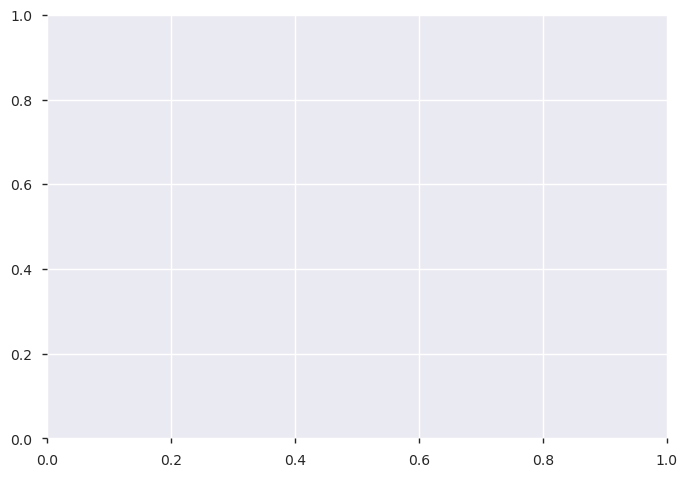

In [67]:
fig = plt.figure()
plot = fig.add_subplot(111)

In [ ]:
plot.hist(np.array(edges.tolist()),np.array(frequencies.tolist()))

In [60]:
plot.hist(np.array(edges.tolist()),np.array(frequencies.tolist()))

(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0.45 , 1.305, 2.16 , 3.015, 3.87 , 4.725, 5.58 , 6.435, 7.29 ,
        8.145, 9.   ]),
 array([      0. ,  772698.4, 1545396.8, 2318095.2, 3090793.6, 3863492. ,
        4636190.4, 5408888.8, 6181587.2, 6954285.6, 7726984. ]),
 <matplotlib.collections.QuadMesh at 0x7f573ffd3d10>)

#### Using cupy with matplotlib

In [26]:
type(dask_cudf_series.dropna())

cudf.core.series.Series

<BarContainer object of 20 artists>

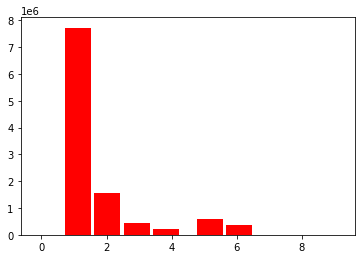

In [27]:
frequencies, edges = cupy.histogram(x=cupy.array(dask_cudf_series) , bins=20)
center = (edges[:-1] + edges[1:]) / 2
plt.bar(center.tolist(), frequencies.tolist(), facecolor="red")

In [25]:
hist_data = histogram(dask_series)

/home/nfs/rabhojwani/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,


/home/nfs/rabhojwani/anaconda3/envs/rapids-env2/lib/python3.7/site-packages/dask/array/core.py:1359: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,


ValueError: object __array__ method not producing an array

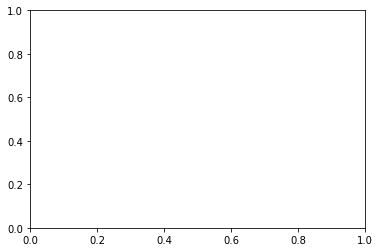

In [26]:
hist_data = histogram(dask_cudf_series)